# Linear regression 
## Forecasting

In [68]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

what we are going to do is first predict the values with formulas and compare it with the ml model predictions

Formula for Linear Regression

A straight line equation is:
y=mx+c

where:

    y = predicted value (forecast)
    x = input (time or independent variable)
    m = slope (how much yy changes for each step in xx)
    c = intercept (starting value of yy when x=0x=0)

In [41]:
#slope
class Linear_Regression():
    def __init__(self):
        self.slope=None
        self.intercept=None

    def Slope(self,input,output):
        if len(output)!=len(input):
            return "The size of dependent and independent variables doesn't match"
        else:
            n=len(input)
            xy=0 #sum of all xy
            x=0 #sum of all x
            y=0 #sum of all y
            x2=0 #sum of all x2
            for i in range(n):
                xy+= input[i]*output[i]
                x+=input[i]
                y+=output[i]
                x2+=input[i]**2

            self.slope=((n*(xy))-(x*y))/((n*(x2))-(x**2))

            print("Slope: ",self.slope)
    
    def update_slope(self,input,output):
        self.Slope(input,output)
        print("Slope Updated")
    
    def Intercept(self,input,output):
        self.intercept=(sum(output)-(self.slope*sum(input)))/len(input)
        print("Intercept: ",self.intercept)
    
    def update_intercept(self,input,output):
        self.Intercept(input,output)
        print("Intercept Updated")
    
    def update_parameter(self,input,output):
        self.Slope(input,output)
        self.Intercept(input,output)
        if self.slope!=None and self.intercept!=None:
            print("Params Updated")
    
    def predict(self,input):
        predictions=[]
        for data in input:
            prediction=self.slope*data+self.intercept
            predictions.append(prediction)
        return predictions
    


In [39]:
input_values = [i for i in range(1, 101)]

output_values = [
    7.4, 10.2, 15.1, 18.8, 21.7, 24.5, 28.9, 31.3, 35.2, 38.1,
    41.6, 45.8, 48.5, 51.9, 55.3, 59.1, 63.2, 66.7, 70.4, 74.2,
    78.3, 81.6, 85.2, 89.1, 93.4, 96.5, 100.1, 104.7, 108.3, 112.5,
    115.9, 120.4, 124.1, 127.9, 132.6, 136.5, 139.7, 143.4, 147.2, 151.3,
    155.1, 159.6, 163.2, 167.9, 171.5, 176.2, 180.4, 183.9, 188.5, 192.1,
    195.7, 200.4, 203.8, 208.1, 212.6, 216.7, 220.4, 224.3, 229.2, 233.5,
    236.9, 241.2, 245.6, 250.1, 254.3, 258.7, 263.1, 267.4, 271.6, 276.3,
    280.9, 285.1, 289.4, 293.7, 297.9, 302.2, 306.8, 310.5, 315.1, 319.4,
    323.8, 328.2, 332.6, 336.7, 340.4, 344.8, 349.3, 353.9, 358.1, 362.5,
    366.9, 371.3, 375.7, 379.9, 384.2, 388.5, 393.1, 397.4, 402.1, 406.5
]

In [45]:
x_train,x_test,y_train,y_test=train_test_split(input_values,output_values,train_size=0.7,shuffle=True)

In [46]:
print(len(x_train),len(y_train))

70 70


In [47]:
model=Linear_Regression()
model.Slope(x_train,y_train)
model.Intercept(x_train,y_train)
predictions=model.predict(x_test)


Slope:  4.04734696636699
Intercept:  -5.720636876743421


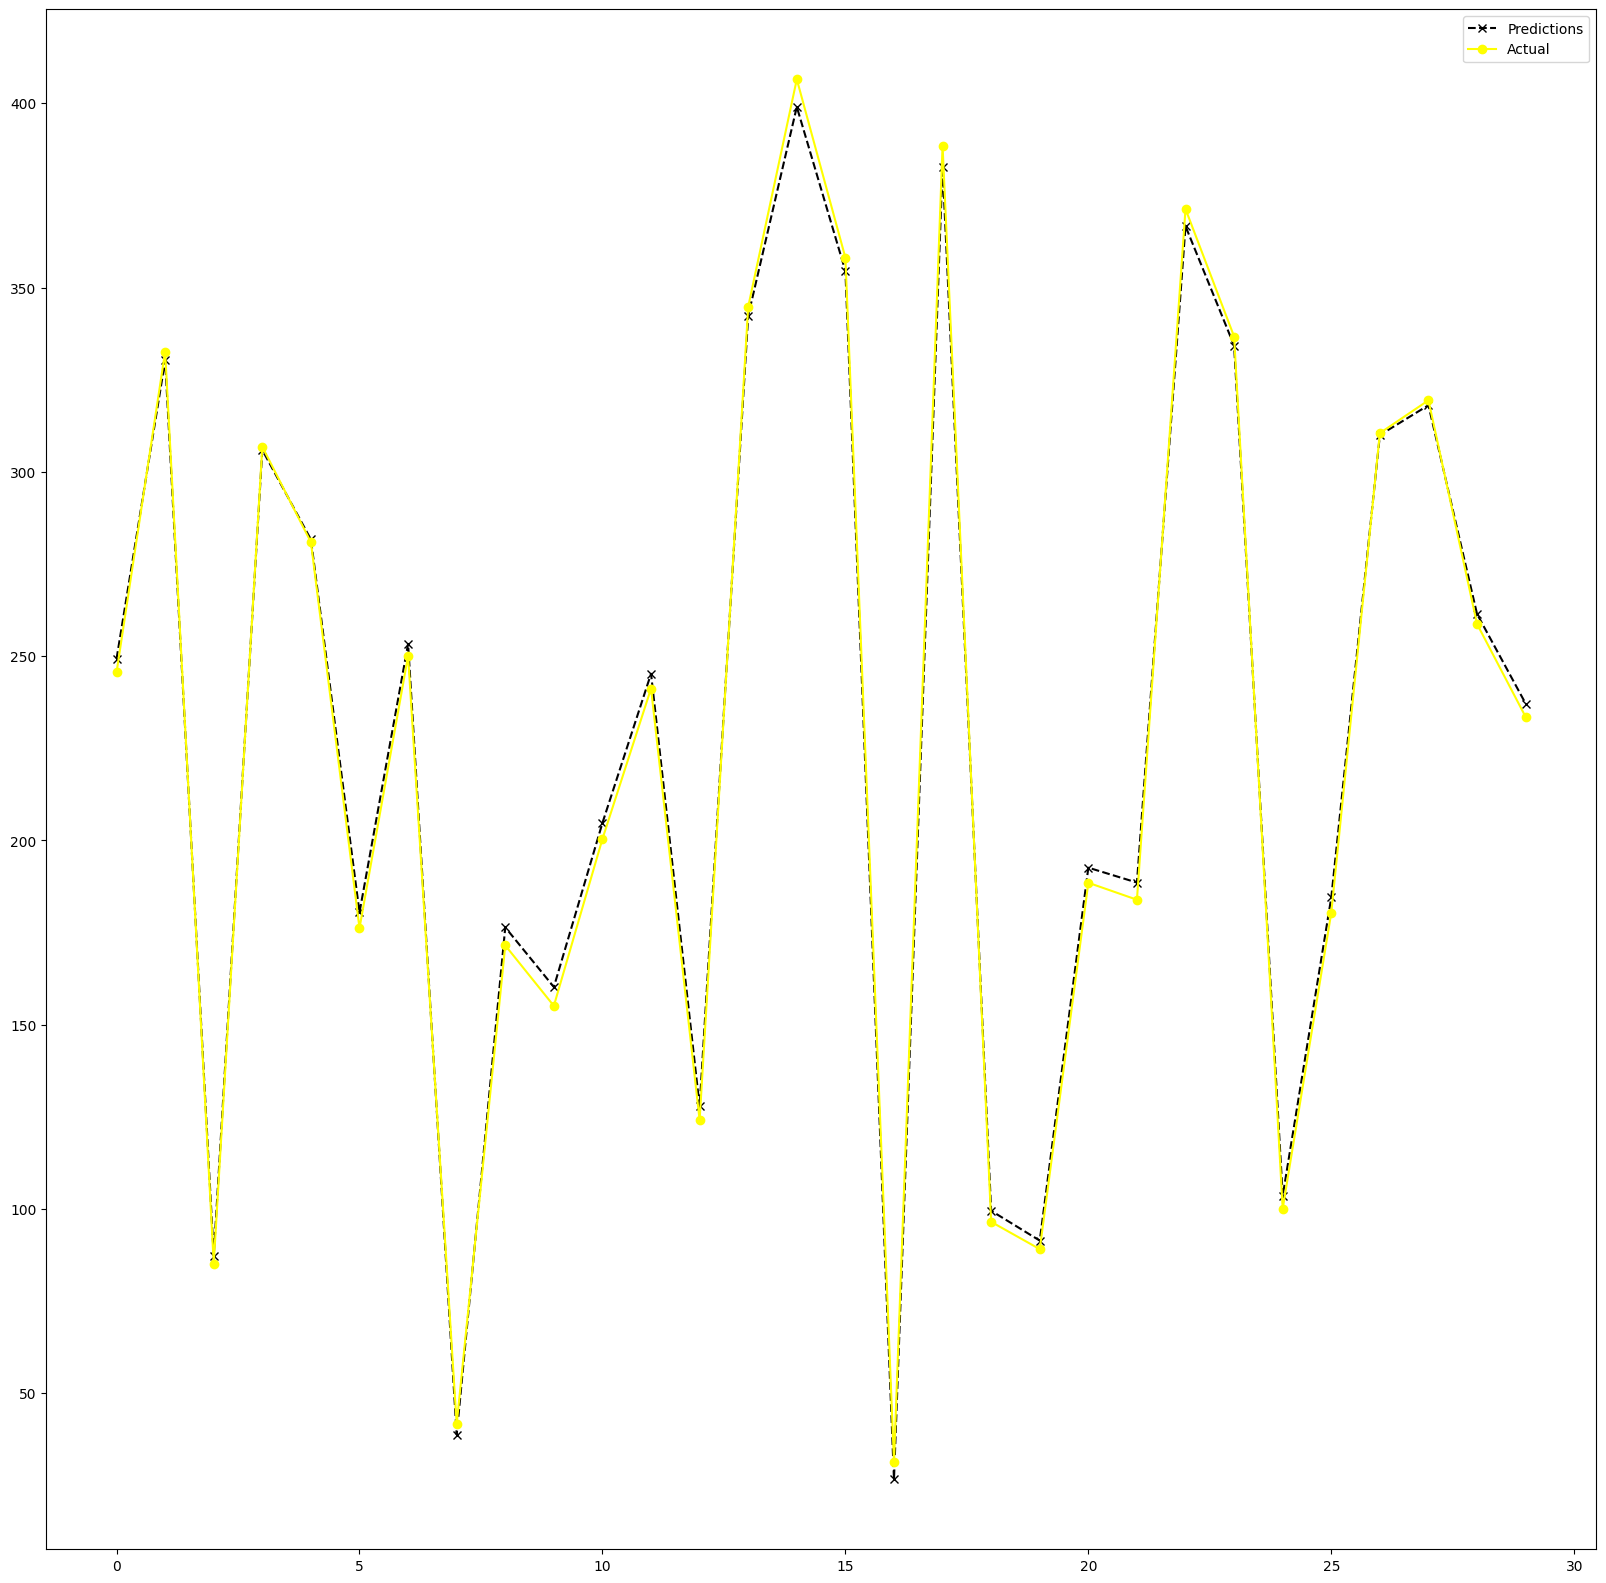

In [82]:
plt.figure(figsize=(20,20))
plt.plot(predictions,linestyle='--',color='black',marker='x',label='Predictions')
plt.plot(y_test,color='yellow',marker='o',label='Actual')
plt.legend()
plt.show()

In [53]:
print("Predicted values:",predictions)
print("Actual values:",y_test)

Predicted values: [249.26222200437695, 330.20916133171676, 87.36834334969734, 305.9250795335148, 281.6409977353129, 180.45732357613812, 253.30956897074395, 38.80017975329347, 176.40997660977115, 160.22058874430317, 204.74140537434008, 245.21487503800998, 127.84181301336726, 342.35120223081776, 399.0140597599556, 354.4932431299187, 26.6581388541925, 382.8246718944876, 99.51038424879832, 91.41569031606433, 192.5993644752391, 188.5520175088721, 366.63528402901966, 334.25650829808376, 103.5577312151653, 184.50467054250512, 309.9724264998818, 318.0671204326158, 261.40426290347796, 237.120181105276]
Actual values: [245.6, 332.6, 85.2, 306.8, 280.9, 176.2, 250.1, 41.6, 171.5, 155.1, 200.4, 241.2, 124.1, 344.8, 406.5, 358.1, 31.3, 388.5, 96.5, 89.1, 188.5, 183.9, 371.3, 336.7, 100.1, 180.4, 310.5, 319.4, 258.7, 233.5]


In [64]:
model2=LinearRegression()

In [70]:
x1_train=pd.DataFrame({"input":x_train})
x1_test=pd.DataFrame({"input":x_test})
y1_train=pd.DataFrame({"output":y_train})
y1_test=pd.DataFrame({"output":y_test})

In [71]:
x1_train

,input
0,88
1,30
2,28
3,98
4,20
...,...
65,43
66,73
67,1
68,55


In [72]:
model2.fit(x1_train,y1_train)

LinearRegression()

In [73]:
y1_preds=model2.predict(x1_test)

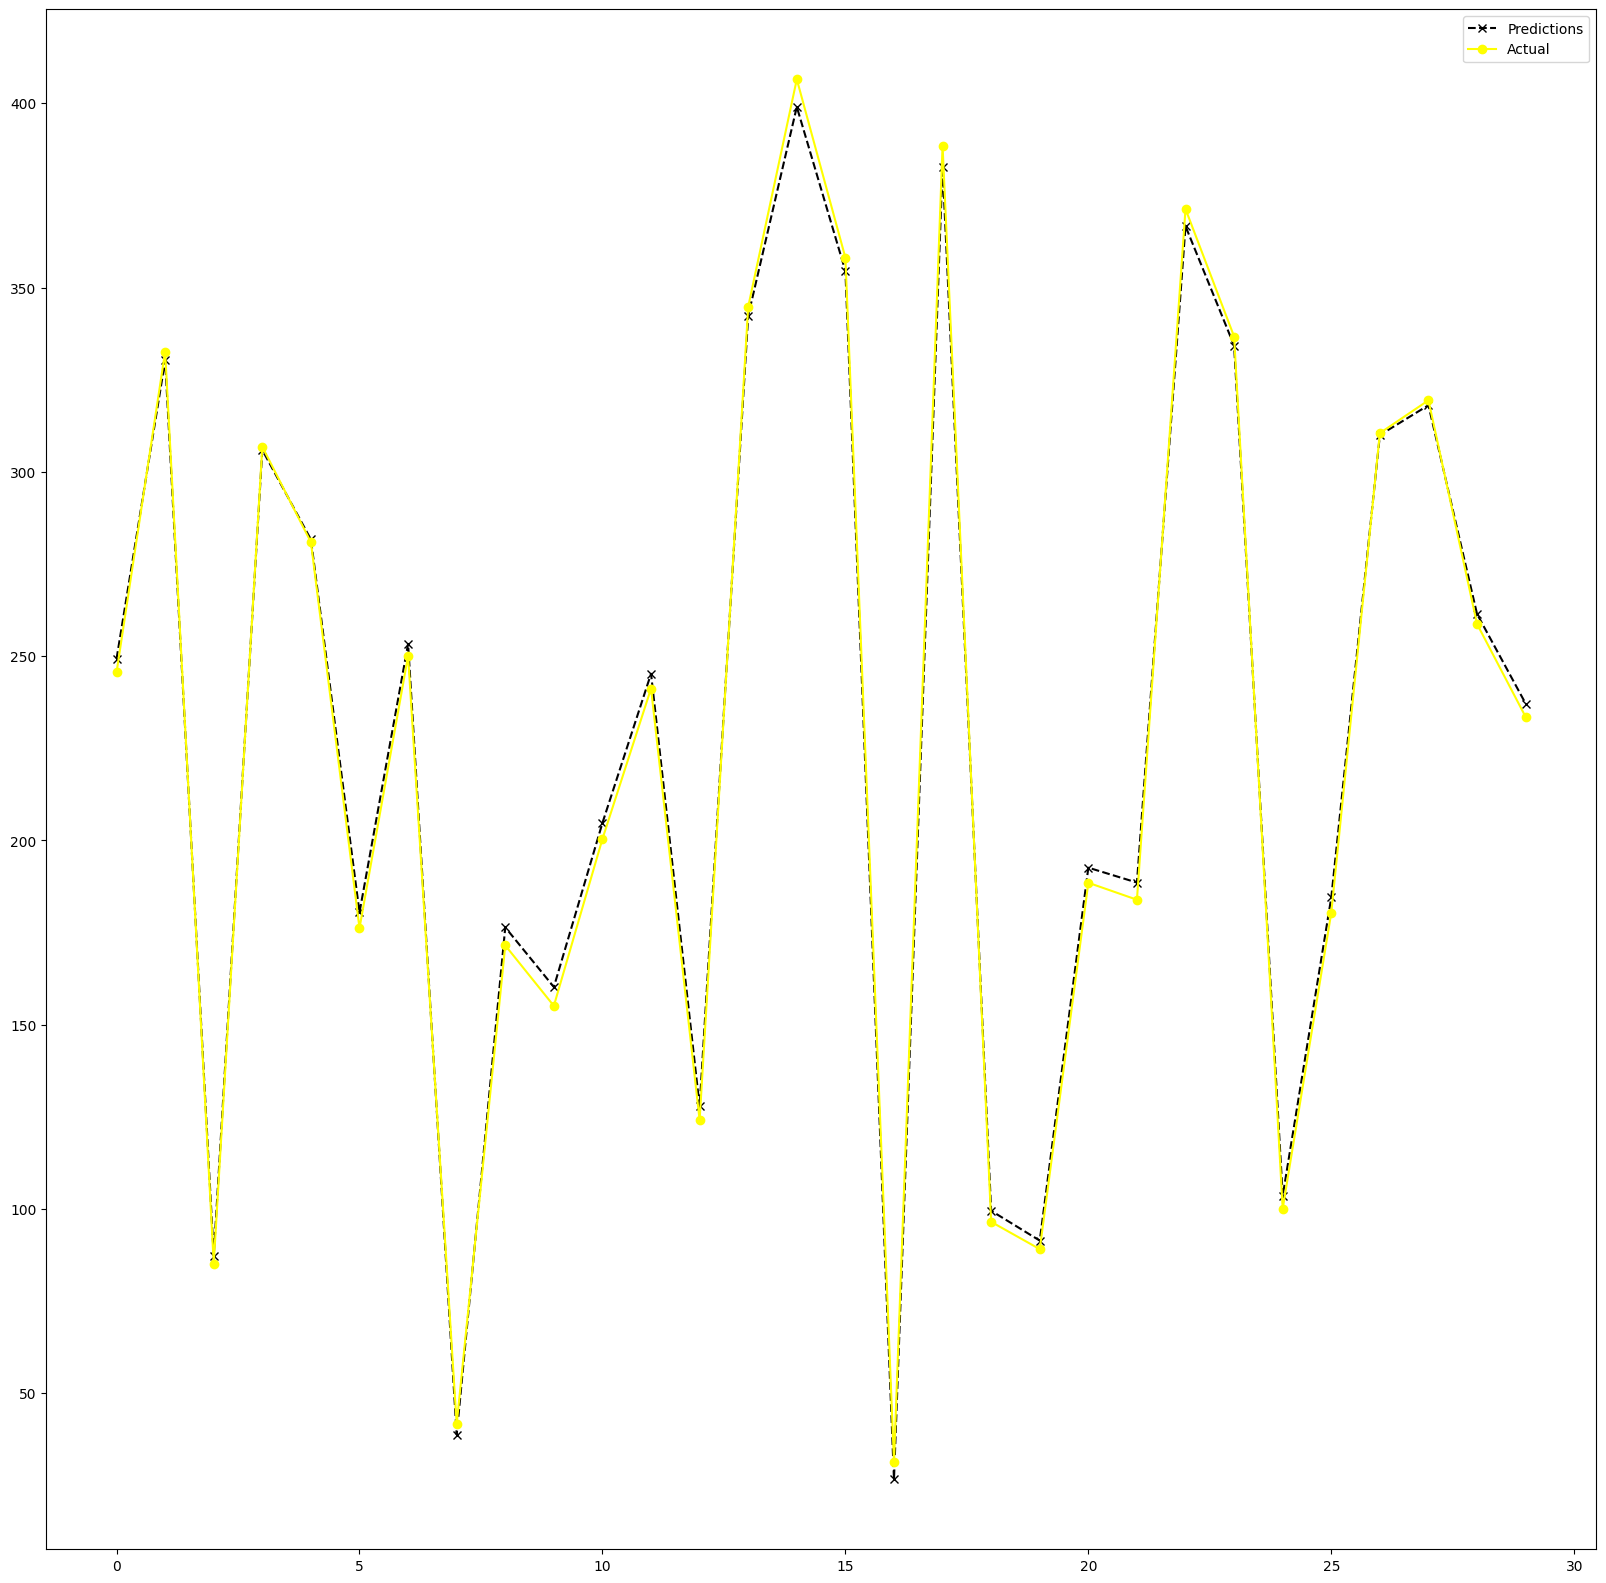

In [80]:
plt.figure(figsize=(20,20))
plt.plot(y1_preds,linestyle='--',marker='x',color='black',label='Predictions')
plt.plot(y1_test,marker='o',color="yellow",label='Actual')
plt.legend()
plt.show()

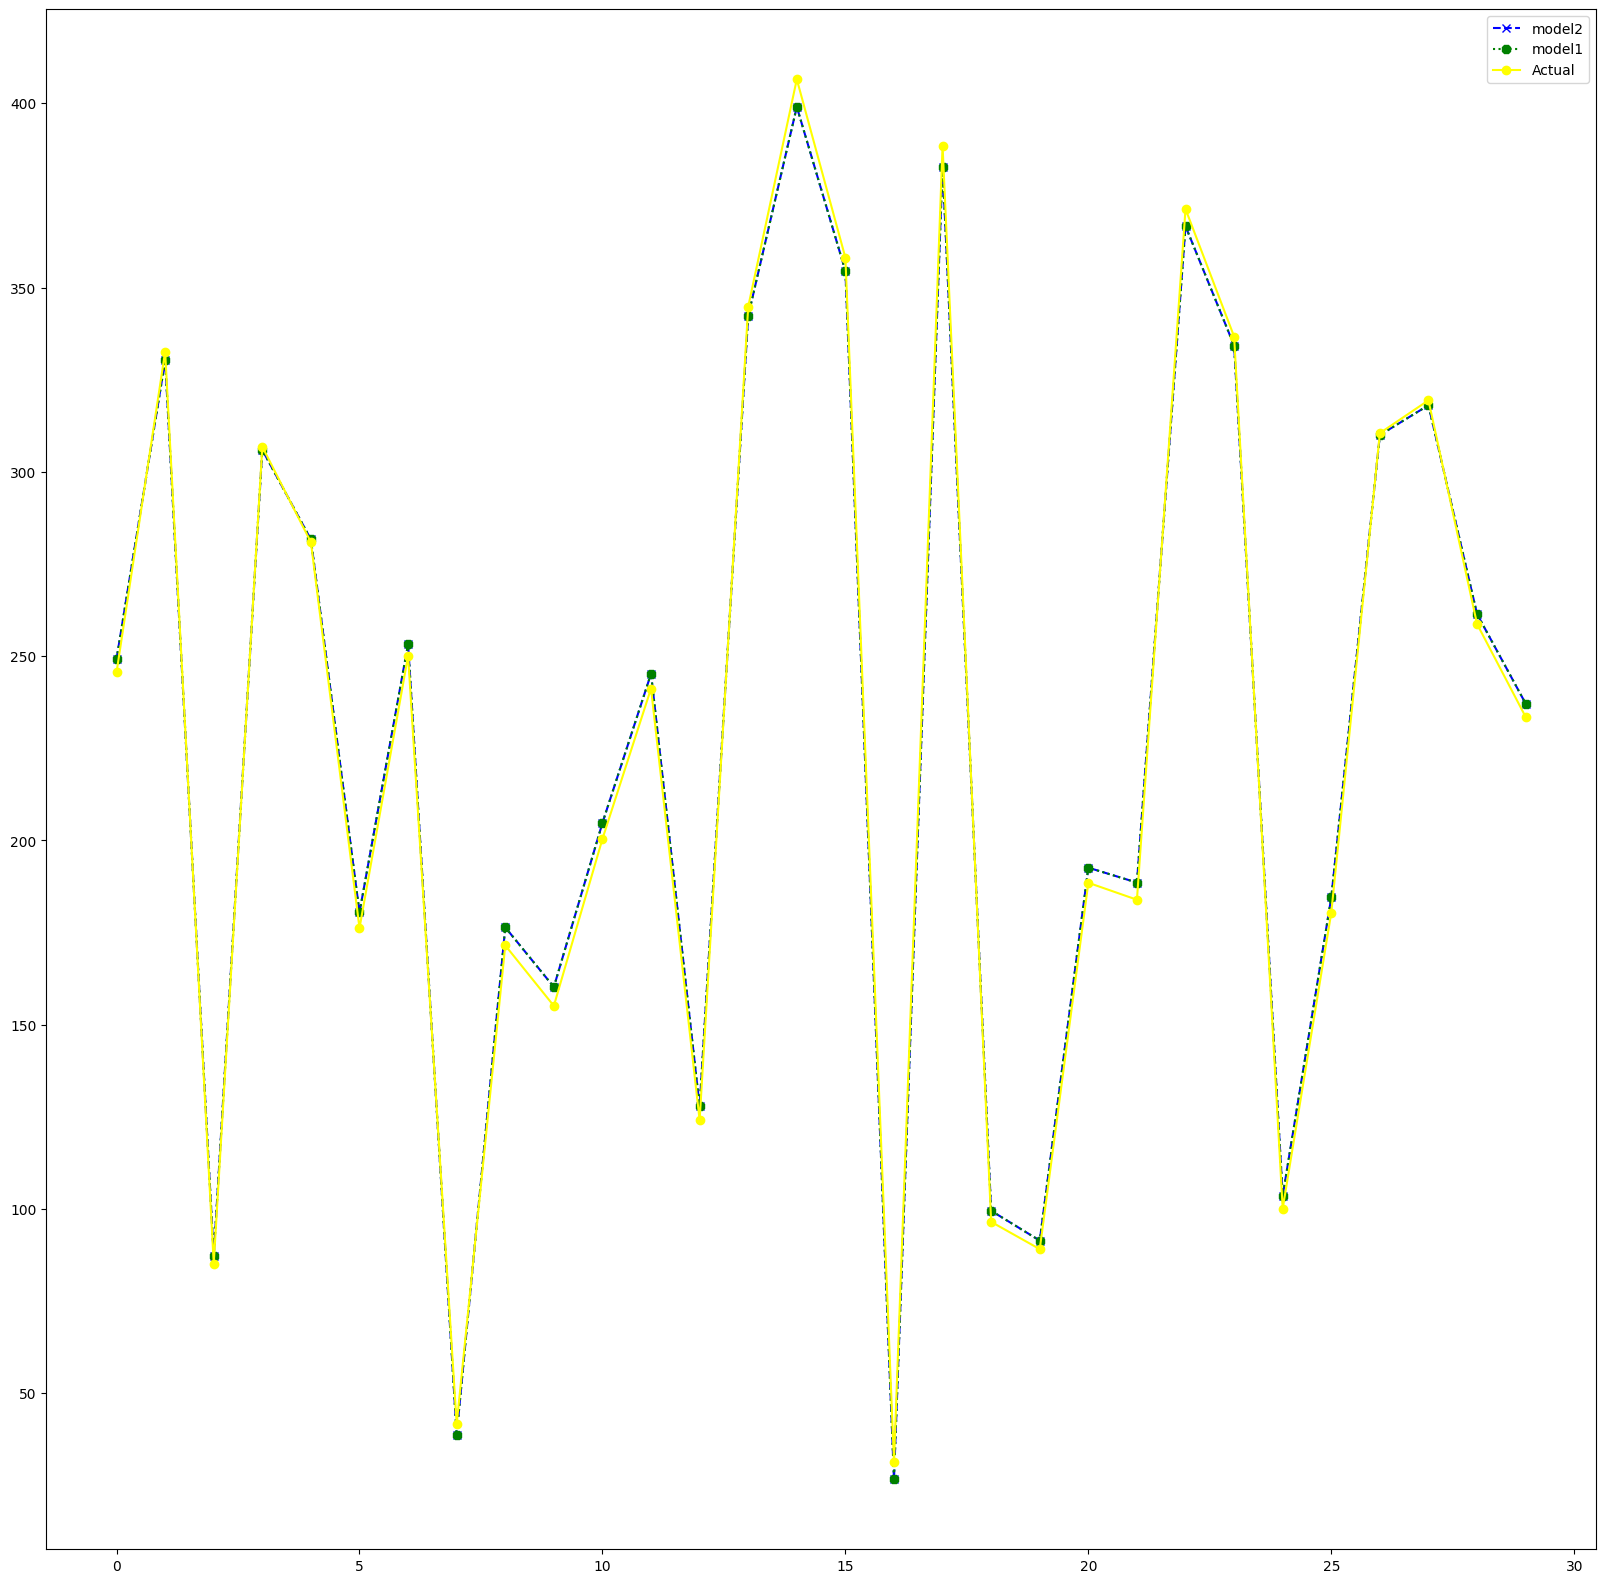

In [86]:
plt.figure(figsize=(20,20))
plt.plot(y1_preds,linestyle='--',marker='x',color='blue',label='model2')
plt.plot(predictions,linestyle='dotted',marker='8',color='green',label='model1')
plt.plot(y1_test,marker='o',color="yellow",label='Actual')
plt.legend()
plt.show()

In [88]:
print(*predictions)
print(*y1_preds)

249.26222200437695 330.20916133171676 87.36834334969734 305.9250795335148 281.6409977353129 180.45732357613812 253.30956897074395 38.80017975329347 176.40997660977115 160.22058874430317 204.74140537434008 245.21487503800998 127.84181301336726 342.35120223081776 399.0140597599556 354.4932431299187 26.6581388541925 382.8246718944876 99.51038424879832 91.41569031606433 192.5993644752391 188.5520175088721 366.63528402901966 334.25650829808376 103.5577312151653 184.50467054250512 309.9724264998818 318.0671204326158 261.40426290347796 237.120181105276
[249.262222] [330.20916133] [87.36834335] [305.92507953] [281.64099774] [180.45732358] [253.30956897] [38.80017975] [176.40997661] [160.22058874] [204.74140537] [245.21487504] [127.84181301] [342.35120223] [399.01405976] [354.49324313] [26.65813885] [382.82467189] [99.51038425] [91.41569032] [192.59936448] [188.55201751] [366.63528403] [334.2565083] [103.55773122] [184.50467054] [309.9724265] [318.06712043] [261.4042629] [237.12018111]
